# K-Nearest Neighbors on Fashion MNIST
This algorithm classifies data points based on identifying data points as one class if they are similar. We have tried to get accuracy score with different distance metrics: Manhattan, Euclidean and Minkowski.



First, we import all necessary libraries. We will need seaborn to plot confusion matrix, accuracy_score to evaluate accuracy of our algorithm, KNeighbotsClassifier and KMeans for KNN.
Also, we import SVC with rbf kernel. This is described in details in Methods section. Then we import our data and split it to train and test sample (6000 / 1000 by default)



In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

from tensorflow import keras
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report


from sklearn.svm import SVC 
mnist_fashion_data = keras.datasets.fashion_mnist # import neccessary Fashion dataset
(X_train_initial, y_train), (X_test_initial, y_test) = mnist_fashion_data.load_data() 

Define class names for our data set. It includes types of clothes

In [ ]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Then we normalize our train and test images, and convert 2d array to 1d array for practical purposes

In [ ]:
X_train_initial = X_train_initial/np.float32(255)
X_test_initial = X_test_initial/np.float32(255)

def dimension_converter(np_array):
  arr = [] #create empty 1d array
  dimension = np_array.shape
  for i in range(dimension[0]):
    arr.append(np_array[i].flatten()) #return a copy of np_array in  1 dimension and append it to initially empty array
  arr = np.array(arr)
  return arr

X_train = dimension_converter (X_train_initial)
X_test = dimension_converter (X_test_initial)


# Employing KNN with different metrics

KNN with mangattan metrics. We apply KNeighbors Classifier with 12 neighbors, then fit data, find predicted labels and accuracy score. Same procedure is for all metrics. Also, we find and plot confusion matrix predicted values vs actual values.

In [ ]:
k_nearest_manhattan = KNeighborsClassifier(n_neighbors=12, metric= 'manhattan')
k_nearest_manhattan.fit(X_train, y_train)
k_nearest_manhattan_predict = k_nearest_manhattan.predict(X_test)

In [ ]:
print('Test accuracy for 12-nearest neighbors with manhattan metrics: ' + str(accuracy_score(k_nearest_manhattan_predict,y_test)))
print('Test precision for 12-nearest neighbors with manhattan metrics: ' + str(precision_score(y_test,k_nearest_manhattan_predict, average='macro')))
print('Test recall score for 12-nearest neighbors with manhattan metrics: ' + str(recall_score(y_test,k_nearest_manhattan_predict, average='macro')))

Test accuracy for 12-nearest neighbors with manhattan metrics: 0.8568
Test precision for 12-nearest neighbors with manhattan metrics: 0.8576284924302755
Test recall score for 12-nearest neighbors with manhattan metrics: 0.8568


In [ ]:
confusion_matrix_manhattan= confusion_matrix(y_test, k_nearest_manhattan_predict)

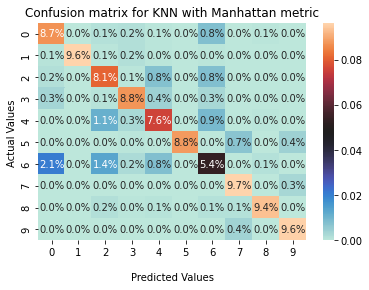

In [ ]:
heatmap_manhattan = sns.heatmap(confusion_matrix_manhattan/np.sum(confusion_matrix_manhattan), annot=True,  fmt='.1%', cmap='icefire')
heatmap_manhattan.set_title('Confusion matrix for KNN with Manhattan metric')
heatmap_manhattan.set_xlabel('\nPredicted Values')
heatmap_manhattan.set_ylabel('Actual Values ');


In [ ]:
k_nearest_euclidean = KNeighborsClassifier(n_neighbors=12, metric= 'euclidean')
k_nearest_euclidean.fit(X_train, y_train)
k_nearest_euclidean_predict = k_nearest_euclidean.predict(X_test)

In [ ]:
print('Test accuracy for 12-nearest neighbors with euclidean metrics: ' + str(accuracy_score(k_nearest_euclidean_predict,y_test)))
print('Test precision for 12-nearest neighbors with euclidean metrics: ' + str(precision_score(y_test,k_nearest_euclidean_predict, average='macro')))
print('Test recall score for 12-nearest neighbors with euclidean metrics: ' + str(recall_score(y_test,k_nearest_manhattan_predict, average='macro')))

Test accuracy for 12-nearest neighbors with euclidean metrics: 0.8471
Test precision for 12-nearest neighbors with euclidean metrics: 0.8501686265767114
Test recall score for 12-nearest neighbors with euclidean metrics: 0.8568


In [ ]:
confusion_matrix_euclidean= confusion_matrix(y_test, k_nearest_euclidean_predict)

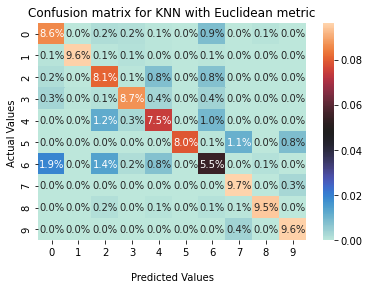

In [ ]:
heatmap_euclidean = sns.heatmap(confusion_matrix_euclidean/np.sum(confusion_matrix_euclidean), annot=True,  fmt='.1%', cmap='icefire')
heatmap_euclidean.set_title('Confusion matrix for KNN with Euclidean metric')
heatmap_euclidean.set_xlabel('\nPredicted Values')
heatmap_euclidean.set_ylabel('Actual Values ');


In [ ]:
k_nearest_minkowski = KNeighborsClassifier(n_neighbors=12, metric= 'minkowski')
k_nearest_minkowski.fit(X_train, y_train)
k_nearest_minkowski_predict = k_nearest_minkowski.predict(X_test)

In [ ]:
print('Test accuracy for 12-nearest neighbors with minkowski metrics: ' + str(accuracy_score(k_nearest_minkowski_predict,y_test)))
print('Test precision for 12-nearest neighbors with minkowski metrics: ' + str(precision_score(y_test,k_nearest_minkowski_predict, average='macro')))
print('Test recall score for 12-nearest neighbors with minkowski metrics: ' + str(recall_score(y_test,k_nearest_minkowski_predict, average='macro')))

Test accuracy for 12-nearest neighbors with minkowski metrics: 0.8471
Test precision for 12-nearest neighbors with minkowski metrics: 0.8501686265767114
Test recall score for 12-nearest neighbors with minkowski metrics: 0.8471


In [ ]:
confusion_matrix_minkowski= confusion_matrix(y_test, k_nearest_minkowski_predict)

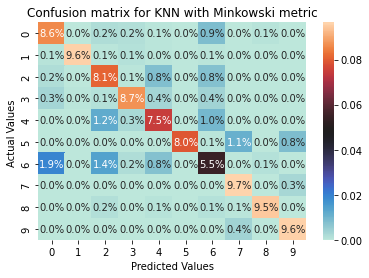

In [ ]:
heatmap_minkowski = sns.heatmap(confusion_matrix_minkowski/np.sum(confusion_matrix_minkowski), annot=True,  fmt='.1%', cmap='icefire')
heatmap_minkowski.set_title('Confusion matrix for KNN with Minkowski metric')
heatmap_minkowski.set_xlabel('Predicted Values')
heatmap_minkowski.set_ylabel('Actual Values ');